In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 99% !important;}</style>"))

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext()

23/09/29 15:47:05 WARN Utils: Your hostname, Alashmony-Lenovo-Z51-70 resolves to a loopback address: 127.0.1.1; using 192.168.1.182 instead (on interface wlp3s0)
23/09/29 15:47:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/29 15:47:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
spark

# Where to Begin

## Where to Begin
1. Where to Begin

Hi, I'm John Hogue and welcome to Feature Engineering with PySpark. Easily one of the most important aspects of applied machine learning is feature engineering. It is the process of using domain knowledge to create new features to help our models perform better. In this course, we will look at a real data set and work our way to building a Regression Model in PySpark.

2. Diving Straight to Analysis

Before we dive in its important to note that while the techniques you'll learn in this course are invaluable, that data science cannot be applied as a cookie cutter. You will need to research your data and become your own expert. There is much to be said of the dangers of not understanding your data, especially where our outputs are increasingly being used to make decisions and inform policies. Before you dive into modeling, spend time to define what your goals are and how the output might be used. Take the time to research your data and its limitations. Often times you may be tasked with explaining what is and isn't possible. Lastly, remember that data science is all about being curious, asking questions and applying new ways to solve problems!

3. The Data Science Process

Every project and data set is different. Data Science is an iterative process that requires comfort with uncertainty as at any point you may have to go backward or even start over. A good project may inspire further questions that set the goals for the next project! As we progress through this process, this course will have extra emphasis on a lot of the 'art' sides of data science, exploring data, cleaning it and engineering it for use in a model.

4. Spark changes fast and frequently

Before we get started, as a cutting-edge technology, Spark changes fast and frequently. Make sure you are looking at the right version! You can always go to the latest URL by using slash latest or put the version number, major, minor and patch to get a specific version. Programmatically you can check your version of Spark with these commands. That way you can ensure you are looking at the right documentation and not using deprecated methods!

5. Data Formats: Parquet

For this course, we will be using a Parquet file. Like most data in Hadoop, the platform that Spark runs on, it is a write once, read many times format. Parquet data is columnar, meaning that it is organized by columns, an important feature for huge data sets as it is blazingly fast to read in ONLY the data you need. CSVs, on the other hand, have to read and parse the whole data set to read a single field. Another difference is Parquet fields are defined and typed, saving users from defining data types, like dates, booleans, or strings. For this reason, parquet is relatively slow to write. Since it's not delimited by characters it's less likely to be read in wrong if those characters exist in the data. These are just a few advantages that are causing the industry to adopt Parquet quickly.

6. Getting the Data to Spark

We have many format readers to choose from for converting various file types to a PySpark DataFrame. Here we will use spark read parquet and put the results into the variable df representing a dataframe.

7. Let's Practice!

In this video, we covered off on some important considerations when starting any data science project. We also learned about parquet and how to load it to a spark dataframe. In the exercises, you'll verify the versioning of PySpark and Python and finally, you'll load the data yourself!

### Check Version
Checking the version of which Spark and Python installed is important as it changes very quickly and drastically. Reading the wrong documentation can cause lots of lost time and unnecessary frustration!

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the [PySpark Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/65076e3c-9df1-40d5-a0c2-36294d9a3ca9) and keep it handy!

### Instructions
- Print the Spark `version`.
- Print the Python `version_info`.

In [7]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info)

3.4.0
sys.version_info(major=3, minor=10, micro=13, releaselevel='final', serial=0)


### Load in the data
Reading in data is the first step to using PySpark for data science! Let's leverage the new industry standard of parquet files!

**Instructions**

- Use the `parquet()` file reader to read in `'Real_Estate.parq'` as described in the video exercise.
- Print out the list of columns with `columns`.

In [8]:
import pandas as pd

In [9]:
#Prepare the parquest from the csv
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv",header=True, inferSchema=True)

df.columns

['No.',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6'

In [10]:
#df.write.parquet("Real_Estate.parq")
df.toPandas().to_parquet("Real_Estate.parq")

23/09/29 15:47:15 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [11]:
# Read the file into a dataframe
#print(os.listdir())
#print(os.getcwd())
#df = spark.read.parquet('/tmp/tmpfkser8re/Real_Estate.parq')

df = spark.read.parquet('Real_Estate.parq')
# Print columns in dataframe
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

## Defining A Problem
1. Defining A Problem

What's the point of doing an analysis if you aren't solving the right problem? In this video, we will define our problem and the context of our data.

2. What’s Your Problem?

We are going to build a model to predict how much a house sells for. This question can be interpreted multiple ways which is why it's important to take the time formally define it. Let's assume we are real-estate tycoon's looking for the next best investment opportunity. For a given house on the market, with a listed price and series of attributes describing the home, what is it likely to actually sell for, aka the SALESCLOSEPRICE?

3. Context & Limitations of our Real Estate

The dataset we have is a sample of homes that sold over the course of 2017. Using this sample we are to provide a quick proof of concept of whether it's worth investing in more data for the 5.5 million homes that sold in the US in 2017. To do this we need to understand some of the limitations of the data we have. First, we only have a small geographical area, so to apply our model to new areas, poses serious risk! We know that we only have residential data, so we shouldn't expect to predict how much a business location is worth! Lastly, we only have one year's worth of data which will make it hard to draw strong conclusions about seasonality in this dataset.

4. What types of attributes are available?

The original dataset has hundreds of attributes available but in order to start simple we've already worked with our client to identify around 50 attributes they think are likely to influence the price of a home. These attributes generally fall into these groups. For Dates we have date listed, and the year the home was built. For locational data, we have the city that the home is in, its school district and its actual postal address. We also have many different metrics to gauge the size of the home like number of bed and bathrooms as well as the area of living space. For prices, we have the listing price and we wouldn't be able to predict anything without the sale price! We also have a lot of data available on amenities that a house has like a pool or a garage as well as the construction materials used to build the house.

5. Validating Your Data Load

Big data means a lot can go wrong when loading data make sure you have the right number of records and columns! We can use df count to get the row count, df columns to get the list of columns and we can take the length of df columns to get the number of columns!

6. Checking Datatypes

When we used Parquet, it set the data types for all of our fields which is a huge advantage over CSV. It's still worth checking especially if you weren't the one defining them! Here we can use dtypes on our dataframe to create a list of tuples containing a column name and its corresponding datatype.

7. Let's Practice

In this video, we learned about the data set we will be using and the problem we will be trying to solve. Additionally, we learned how to check to see if our data loaded properly by checking rows, columns, and datatypes! Now it's your turn to apply what you've learned in the exercises to verify that our data got loaded correctly!

### What are we predicting?
Which of these fields (or columns) is the value we are trying to predict for?

- `TAXES`
- `SALESCLOSEPRICE`
- `DAYSONMARKET`
- `LISTPRICE`

**Instructions**

- From the listed columns above, identify which one we will use as our dependent variable `$Y$`.
- Using the loaded data set `df`, filter it down to our dependent variable with `select()`. Store this dataframe in the variable `Y_df`.
- Display summary statistics for the dependent variable using `describe()` on `Y_df` and calling `show()` to display it.

In [12]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|             48000|
|    max|           1700000|
+-------+------------------+



### Verifying Data Load
Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

**Instructions**

- Create a data validation function `check_load()` with parameters `df` a dataframe, `num_records` as the number of records and `num_columns` the number of columns.
- Using `num_records` create a check to see if the input dataframe df has the same amount with `count()`.
- Compare input number of columns the input dataframe has `withnum_columns` by using `len()` on columns.
- If both of these return True, then print Validation Passed

In [13]:
def check_load(df, num_records, num_columns):
    # Takes a dataframe and compares record and column counts to input
    # Message to return if the critera below aren't met
    message = 'Validation Failed'
    # Check number of records
    if num_records == df.count():
    # Check number of columns
        if num_columns == len(df.columns):
        # Success message
            message = 'Validation Passed'
    return message

# Print the data validation message
print(check_load(df, 5000, 74))

Validation Passed


### Verifying DataTypes
In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct. In this exercise we will validate a dictionary of attributes and their datatypes to see if they are correct. This dictionary is stored in the variable `validation_dict` and is available in your workspace.

**Instructions**

- Using `df` create a list of attribute and datatype tuples with dtypes called `actual_dtypes_list`.
- Iterate through `actual_dtypes_list`, checking if the column names exist in the dictionary of expected dtypes `validation_dict`.
- For the keys that exist in the dictionary, check their dtypes and print those that match.

In [14]:
validation_dict = {'AssumableMortgage': 'string', 'SQFTBELOWGROUND': 'bigint', 'AssociationFee': 'bigint', 'AssessedValuation': 'double', 'ASSESSMENTPENDING': 'string'}

In [15]:
df.dtypes

[('No.', 'int'),
 ('MLSID', 'string'),
 ('StreetNumberNumeric', 'int'),
 ('streetaddress', 'string'),
 ('STREETNAME', 'string'),
 ('PostalCode', 'int'),
 ('StateOrProvince', 'string'),
 ('City', 'string'),
 ('SalesClosePrice', 'int'),
 ('LISTDATE', 'string'),
 ('LISTPRICE', 'int'),
 ('LISTTYPE', 'string'),
 ('OriginalListPrice', 'int'),
 ('PricePerTSFT', 'double'),
 ('FOUNDATIONSIZE', 'int'),
 ('FENCE', 'string'),
 ('MapLetter', 'string'),
 ('LotSizeDimensions', 'string'),
 ('SchoolDistrictNumber', 'string'),
 ('DAYSONMARKET', 'int'),
 ('offmarketdate', 'string'),
 ('Fireplaces', 'int'),
 ('RoomArea4', 'string'),
 ('roomtype', 'string'),
 ('ROOF', 'string'),
 ('RoomFloor4', 'string'),
 ('PotentialShortSale', 'string'),
 ('PoolDescription', 'string'),
 ('PDOM', 'int'),
 ('GarageDescription', 'string'),
 ('SQFTABOVEGROUND', 'int'),
 ('Taxes', 'int'),
 ('RoomFloor1', 'string'),
 ('RoomArea1', 'string'),
 ('TAXWITHASSESSMENTS', 'double'),
 ('TAXYEAR', 'int'),
 ('LivingArea', 'int'),
 ('UNI

In [16]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
#print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
    # Check if column name is dictionary of expected dtypes
    col_name = attribute_tuple[0]
    if col_name in validation_dict.keys():

        # Compare attribute types
        col_type = attribute_tuple[1]
        if col_type == validation_dict[col_name]:
            print(col_name + ' has expected dtype.')

AssumableMortgage has expected dtype.
ASSESSMENTPENDING has expected dtype.
AssessedValuation has expected dtype.


#### Should be
- **SQFTBELOWGROUND has expected dtype.**
- AssumableMortgage has expected dtype.
- **AssociationFee has expected dtype.**
- ASSESSMENTPENDING has expected dtype.
- AssessedValuation has expected dtype.

In [17]:
print(actual_dtypes_list)

[('No.', 'int'), ('MLSID', 'string'), ('StreetNumberNumeric', 'int'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'int'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'int'), ('LISTDATE', 'string'), ('LISTPRICE', 'int'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'int'), ('PricePerTSFT', 'double'), ('FOUNDATIONSIZE', 'int'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'int'), ('offmarketdate', 'string'), ('Fireplaces', 'int'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'int'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'int'), ('Taxes', 'int'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'double'), ('TAXYEAR', 'int'), ('LivingArea', 'int'), ('UNITNUMBER', 'string'), ('YEARBUILT', 'i

## Visually Inspecting Data / EDA
1. Visually Inspecting Data

Data comes in all shapes and sizes. In the field, you will be tasked with using less than perfect data. This means you will need to understand its strengths, weaknesses, and limitations to leverage it effectively.

2. Getting Descriptive with DataFrame.describe()

To get started with understanding your data take a peek at each column to see what they contain. The describe function provides some bare bones basics of Count, Mean, Std Dev, Min and Max. You can run it on the whole dataframe, a single column or a list of columns. Remember to add show to the end if you wish to immediately display results.

3. Many descriptive functions are already available

To further help us understand our data, Pyspark has many built-in descriptive functions available.

4. Example with mean()

The Mean function is considered an aggregate function and as such needs to be passed to the agg method along with the column to run it on as a dictionary. Spark uses lazy evaluation, meaning that it waits to execute code until a specific type of command, called an action forces it to. To force it to return the results immediately, use the collect function.

5. Example with cov()

Covariance is a function that let's us see how two variables vary together. This function is applied to a dataframe and takes two numeric columns and returns a value.

6. seaborn: statistical data visualization

An excellent way to explore your data is through statistical plotting. Seaborn is a Python data visualization library designed specifically for this. We will look at a few plotting examples but there are many, many more for you to follow up on.

7. Notes on plotting

We can plot data using non-Spark libraries like Seaborn but they require converting your pySpark DataFrame to a Pandas DataFrame. Be aware that converting large datasets can cause Pandas to crash. This is because PySpark is made for massive datasets, where pandas is not. The Sample function can help us get a smaller dataset to plot. Here, we will keep sampling with replacement off, take 50% of the data and set a random seed for reproducibility. Using count shows us that the number of records has changed.

8. Prepping for plotting a distribution

We will leverage Seaborn's distplot which will show us the distribution of our dependent variable 'SalesClosePrice'. Please note there are many optional parameters which aren't covered here. Here we import seaborn, then filter the Spark DataFrame down to the SalesClosePrice column and sample it. Then we convert it into a pandas dataframe so we can use it with Seaborn. Lastly, call the distplot function with pandas underscore df to plot.

9. Distribution plot of sales closing price

After plotting we can we can see that most of the data is pushed to the left, something that may need to be remedied depending on the model type we choose. We will cover one option, log scaling, in 'Adjusting Data' later in this course.

10. Relationship plotting

Another great plot to use is lmplot. lm is short for linear model and allows us to quickly see if there is a linear relationship between two variables. For this example, we will look at how 'SalesClosePrice' changes depending on 'SQFTABOVEGROUND'. To do this we will import seaborn, filter our dataset to the two columns, sample it and then convert it to a pandas DataFrame. Lastly, use the sns lmplot function with our x and y columns and dataframe.

11. Linear model plot between SQFT above ground and sales price

Here we can see there is what looks to be a strong relationship between the size of a home and the price it sells for. Therefore we might make the assumption that SQFTABOVEGROUND is a good variable to consider in predicting house prices!

12. Let's practice!

In this video, we explored our data with numerical summaries and visualizations. Now it's your turn to try them out!

## Using Corr()
The old adage 'Correlation does not imply Causation' is a cautionary tale. However, correlation does give us a good nudge to know where to start looking promising features to use in our models. Use this exercise to get a feel for searching through your data for the first time, trying to find patterns.

A list called `columns` containing column names has been created for you. In this exercise you will compute the correlation between those `columns` and `'SALESCLOSEPRICE'`, and find the maximum.

**Instructions**

- Use a `for` loop iterate through the `columns`.
- In each loop cycle, compute the correlation between the current column and `'SALESCLOSEPRICE'` using the `corr()` method.
- Create logic to update the maximum observed correlation and with which column.
- Print out the name of the column that has the maximum correlation with `'SALESCLOSEPRICE'`.

In [18]:
columns = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES', 'PDOM', 'SQFTABOVEGROUND', 'TAXES', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LIVINGAREA', 'YEARBUILT', 'ACRES', 'BACKONMARKETDATE', 'BATHSFULL', 'BATHSHALF', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'BEDROOMS', 'SQFTBELOWGROUND', 'ASSOCIATIONFEE', 'ASSESSEDVALUATION']


In [19]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    # Check the correlation of a pair of columns
    corr_val = df.corr(col, 'SALESCLOSEPRICE')
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col)

LIVINGAREA


### Using Visualizations: distplot
Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the `'LISTPRICE'` variable, and you will gain more insights on its distribution by computing the skewness.

The `matplotlib.pyplot` and `seaborn` packages have been imported for you with aliases `plt` and `sns`.

**Instructions**

- Sample 50% of the dataframe `df` with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark `DataFrame` to a `pandas.DataFrame()` with `toPandas()`.
- Plot a distribution plot using seaborn's `distplot()` method.
- Import the `skewness()` function from `pyspark.sql.functions` and compute it on the aggregate of the `'LISTPRICE'` column with the `agg()` method. Remember to `collect()` your result to evaluate the computation. 

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns

/tmp/ipykernel_83945/4078765244.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


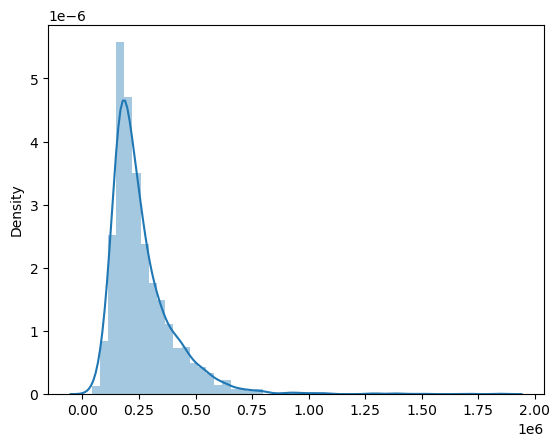

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [21]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, .5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show();

# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

/mnt/Data/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


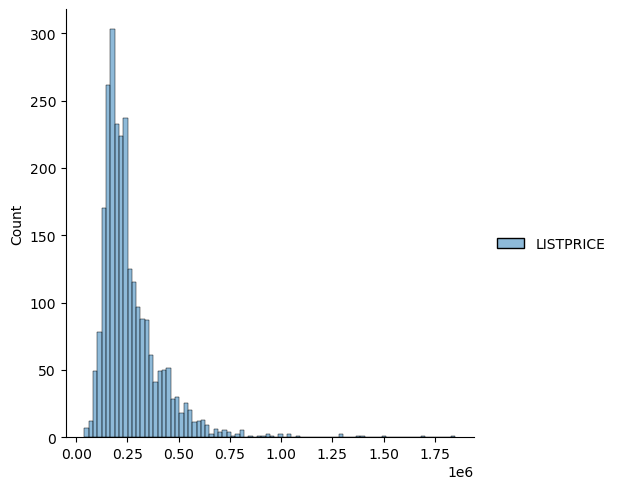

In [22]:
sns.displot(pandas_df)
plt.show();

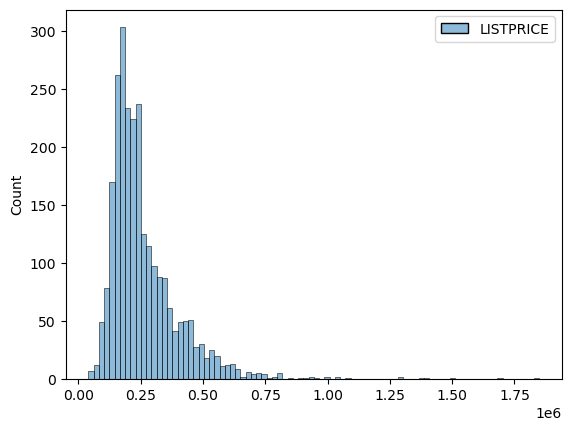

In [23]:
sns.histplot(pandas_df)
plt.show()

### Using Visualizations: lmplot
Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

`seaborn` is available in your workspace with the customary alias `sns`.

**Instructions**

- Using the loaded data set df filter it down to the columns `'SALESCLOSEPRICE'` and `'LIVINGAREA'` with `select()`.
- Sample 50% of the dataframe with `sample()` making sure to not use replacement and setting the random seed to 42.
- Convert the Spark DataFrame to a `pandas.DataFrame()` with `toPandas()`.
- Using `'SALESCLOSEPRICE'` as your dependent variable and `'LIVINGAREA'` as your independent, plot a linear model plot using seaborn `lmplot()`.

/mnt/Data/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


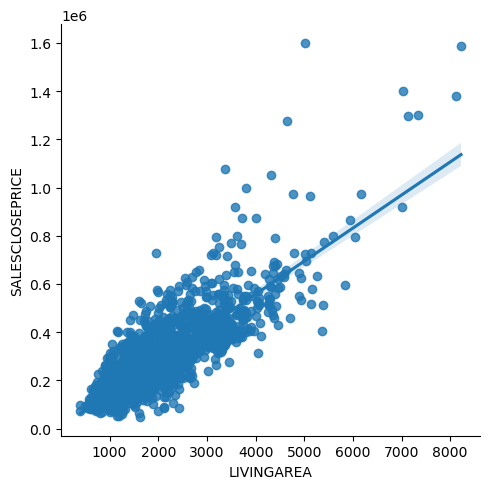

In [24]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show();

# Wrangling with Spark Functions

## Dropping data

1. Dropping Data

More data is better right? Not if its bad data! The saying "garbage in, garbage out" is doubly true in data science!

2. Where can data go bad?

Data has a lot of places where it can get messed up. Data may be recorded incorrectly or contain extreme events. Inconsistent formatting such as mixing numeric and text data can make a field hard to use. Duplications can add redundant observations. Missing data can cause your analysis to have blind spots. Lastly, sometimes the data is just not relevant to the analysis. Failure to account for bad data can set your analysis up to fail. Please be careful!

3. Dropping Columns

Inspecting our data we can see there are some columns that are not worth including in our analysis. NO is just the record number, UNITNUMBER is the apartment or house number, and CLASS is completely constant.

4. Dropping Columns

Dropping the columns requires entering a single column name or passing a list of columns to drop. Here we pass a list called cols_to_drop to the function and then drop them. Please note the star, which tells the function to unpack the list and feed them to the function one by one.

5. Text Filtering

A common task in cleaning your data will be filtering it. Here we will filter records that contain specific text values. Where applies the filter to the dataframe records. Like creates a True/False condition for the records. The Tilde provides a way to take the opposite, or a NOT. The PySpark code reads: Filter the dataframe where the POTENTIALSHORTSALE field is NOT like the string 'Not Disclosed'

6. Outlier Filtering

For an initial pass at the model, it might be helpful to remove large outliers. One definition of an outlier for near normally distributed data is something that occurs more than 3 standard deviations from the mean, only 0-point-3% of data should be filtered. Remember outliers occur on both sides, so filter on both sides of the mean!

7. Value Filtering Example

Here we will filter extreme values from the LISTPRICE column. To start, we will use the aggregate functions standard deviation and mean. Then use collect to force the calculation to run and use the zero, zero index to access the values. Lastly we created a multi-conditional filter, which is just two boolean statements ANDed together. It reads, filter where the LISTPRICE is less than the hi_bound and more than the low_bound.

8. Dropping NA's or NULLs

Dealing with missing data is something we will cover later as dropping data is usually a naive approach. Nevertheless, it is important to sometimes take shortcuts to quickly prove out the basis for further work. Dropna does what you'd expect it to do. In its basic form, it will remove a record where there is any null value in any column. You can get more specific as we'll see on the next slide.

9. Dropping NA's or NULLs

In the first example, we drop any record contains a NULL value. The second example we will look at only two columns and if both are NULL then we will remove the record. Lastly, we can apply a threshold across all the columns and say if more than two columns contain NULL values, remove the entire record.

10. Dropping Duplicates

Duplicates occur when two or more records contain the exact same information. Often this can happen after you drop columns or join datasets. dropDuplicates will drop the first duplicate it finds. Since Spark is distributed, which one it finds first may or may not be in the order of how your file was loaded. If you want to be more picky about where you are looking for duplicates you can specify a list of column names to look for them there specifically.

11. Let's practice!

In this video, we learned why we might have bad data and several ways to remove it so it doesn't adversely impact our analysis. Let's see you take a shot at removing some data in the exercises!



### Dropping a list of columns
Our data set is rich with a lot of features, but not all are valuable. We have many that are going to be hard to wrangle into anything useful. For now, let's remove any columns that aren't immediately useful by dropping them.

- `'STREETNUMBERNUMERIC'`: The postal address number on the home
- `'FIREPLACES'`: Number of Fireplaces in the home
- `'LOTSIZEDIMENSIONS'`: Free text describing the lot shape
- `'LISTTYPE'`: Set list of values of sale type
- `'ACRES'`: Numeric area of lot size

'**Instructions**

- Read the list of column descriptions above and explore their top 30 values with `how()`, the dataframe is already filtered to the listed columns as `df`
- Create a list of two columns to drop based on their lack of relevance to predicting house prices called `cols_to_drop`. Recall that computers only interpret numbers explicitly and don't understand context.
- Use the `drop()` function to remove the columns in the list `cols_to_drop` from the dataframe `df`.

In [25]:
# backup the original DF and select only the columns needed in the practise 
df_full = df
cols_remaining = ['STREETNUMBERNUMERIC','FIREPLACES','LOTSIZEDIMENSIONS', 'LISTTYPE', 'ACRES']
df = df.select(cols_remaining)
df.show(5)

+-------------------+----------+-----------------+---------------+-----+
|STREETNUMBERNUMERIC|FIREPLACES|LOTSIZEDIMENSIONS|       LISTTYPE|ACRES|
+-------------------+----------+-----------------+---------------+-----+
|              11511|         0|          279X200|Exclusive Right| 1.28|
|              11200|         0|          100x140|Exclusive Right| 0.32|
|               8583|         0|          120x296|Exclusive Right|0.822|
|               9350|         1|          208X208|Exclusive Right| 0.94|
|               2915|         1|          116x200|Exclusive Right|  0.0|
+-------------------+----------+-----------------+---------------+-----+
only showing top 5 rows



In [26]:
# Show top 30 records
df.show(30)

# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

+-------------------+----------+--------------------+---------------+-----+
|STREETNUMBERNUMERIC|FIREPLACES|   LOTSIZEDIMENSIONS|       LISTTYPE|ACRES|
+-------------------+----------+--------------------+---------------+-----+
|              11511|         0|             279X200|Exclusive Right| 1.28|
|              11200|         0|             100x140|Exclusive Right| 0.32|
|               8583|         0|             120x296|Exclusive Right|0.822|
|               9350|         1|             208X208|Exclusive Right| 0.94|
|               2915|         1|             116x200|Exclusive Right|  0.0|
|               3604|         1|              50x150|Exclusive Right|0.172|
|               9957|         0|              common|Exclusive Right| 0.05|
|               9934|         0|              common|Exclusive Right| 0.05|
|               9926|         0|              common|Exclusive Right| 0.05|
|               9928|         0|              common|Exclusive Right| 0.05|
|           

### Using text filters to remove records
It pays to have to ask your clients lots of questions and take time to understand your variables. You find out that Assumable mortgage is an unusual occurrence in the real estate industry and your client suggests you exclude them. In this exercise we will use `isin()` which is similar to `like()` but allows us to pass a list of values to use as a filter rather than a single one.

**Instructions**

- Use `select()` and `show()` to inspect the distinct values in the column `'ASSUMABLEMORTGAGE'` and create the list `yes_values` for all the values containing the string `'Yes'`.
- Use `~df['ASSUMABLEMORTGAGE']`, `isin()`, and `.isNull()` to create a NOT filter to remove records containing corresponding values in the list `yes_values` and to keep records with null values. Store this filter in the variable `text_filter`.
- Use `where()` to apply the `text_filter` to `df`.
- Print out the number of records remaining in `df`.

In [27]:
#Return back to the full DF using the backup
df= df_full
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+



In [28]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)

# Print count of remaining records
print(df.count())

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+

4976


### Filtering numeric fields conditionally
Again, understanding the context of your data is extremely important. We want to understand what a normal range of houses sell for. Let's make sure we exclude any outlier homes that have sold for significantly more or less than the average. Here we will calculate the mean and standard deviation and use them to filer the near normal field `log_SalesClosePrice`.

**Instructions**

- Import `mean()` and `stddev()` from `pyspark.sql.functions`.
- Use `agg()` to calculate the mean and standard deviation for `'log_SalesClosePrice'` with the imported functions.
- Create the upper and lower bounds by taking `mean_val` +/- 3 times `stddev_val`.
- Create a `where()` filter for `'log_SalesClosePrice'` using both `low_bound` and `hi_bound`.

In [29]:
#Create the log_SalesClosePrice as in the practise
df= df_full
#log10 and log2 seems not the rights ones, the log1p provided the correct  statistics 
#Docs https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.log1p.html
from pyspark.sql.functions import log1p
df = df.withColumn('log_SalesClosePrice', log1p(df['SalesClosePrice']))
df.columns
df.select('log_SalesClosePrice').show(5)

+-------------------+
|log_SalesClosePrice|
+-------------------+
| 11.870606902224587|
| 12.154784614286667|
| 12.323860125621126|
| 12.487488878546145|
| 12.428820118415677|
+-------------------+
only showing top 5 rows



In [30]:
#Make sure the statistics matches in the practise
from pyspark.sql.functions import mean, stddev, min, max
min_val = df.agg({'log_SalesClosePrice': 'min'}).collect()[0][0]
max_val = df.agg({'log_SalesClosePrice': 'max'}).collect()[0][0]

print(min_val,max_val)
# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

print(mean_val, stddev_val)

10.778977123006351 14.346139397261565
12.369720943418447 0.454080629857895


In [31]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))

## Adjusting Data
1. Adjusting Data

Jeff Hooper of Bell labs once said, "data does not give up its secrets easily, it must be tortured to confess." This lesson will arm you with the tools to get your data to behave.

2. Why Transform Data?

Real data is ugly and rarely comes ready to be analyzed. Many algorithms and statistical methods have assumptions that a variable conforms to. If our data doesn't fit these criteria all hope isn't lost yet, we can try mathematical operations to adjust the data to become the beautiful butterflies our methods require.

3. What is MinMax Scaling

One common transformation is scaling. For many algorithms like KNN or regression, you need to ensure all your variables are on the same scale. One variable can't be from -1000 to 5000 and another between point-01 and point-02, these algorithms will try to reduce the errors in the first variable much more than the second. We can avoid this by scaling each feature between 0 and 1. This is called Minmax scaling and doesn't change the shape of the distribution of only its range. To Minmax scale, take the variable to be scaled, subtract the minimum value and divide by the difference between the max and min.

4. Minmax Scaling

To scale our data we need to first find the min and max values of the column we want to scale. Here we are using aggregate functions min and max. We will use collect to force the calculation to run and use the zero, zero index to access the values. To create a new column we will use withColumn that creates a new column based off some sort of transformation to an existing one, in this case, DAYSONMARKET. Lastly, we can see that our values are now all between 0 and 1.

5. What is Standardization?

Another common restriction is that the data must closely follow the standard normal distribution. Standardization or z-transforming is the process of shifting and scaling your data to better resemble a standard normal distribution, which has mean of 0 and standard deviation 1. In the image, you can see how the original data in blue, shifts to the green where it has mean 0 and the final step scales it to the standard normal distribution in red.

6. Standardization

To z transform our data, we calculate the aggregate functions mean and std deviation of the column we are transforming. Since want to use the values in the next step we will use collect to immediately calculate them and use the index values of [0][0] to access the returned values. We can then apply the standardization formula to our column and put the results in a new column ztrans_days by using withColumn. Lastly, we can verify that the transformed data does have approximate mean 0 and std deviation of 1.

7. What is Log Scaling

Our data for SALESCLOSEPRICE is pushed to the left. This is called positive skew. One potential way to treat skewed data is to apply a log transformation on the data. This has the impact of making our data look more like a normal distribution.

8. Log Scaling

To apply a log transformation you will need to import the log function from pyspark sql functions. We can then create a new column log_SalesClosePrice based on the application of the log function on SALESCLOSEPRICE.

9. Let's practice!

In this video, you learned why and how to apply transformations to your data. Now its time for you to adjust some data!

### Custom Percentage Scaling
In the slides we showed how to scale the data between 0 and 1. Sometimes you may wish to scale things differently for modeling or display purposes.

**Instructions**

- Calculate the max and min of `DAYSONMARKET` and put them into variables `max_days` and `min_days`, don't forget to use `collect()` on `agg()`.
- Using `withColumn()` create a new column called `'percentagescaleddays'` based on `DAYSONMARKET`.
- `percentage_scaled_days` should be a column of integers ranging from 0 to 100, use `round()` to get integers.
- Print the `max()` and `min()` for the new column `percentage_scaled_days`.

In [32]:
from pyspark.sql.functions import round

In [33]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

# Create a new column based off the scaled data
df = df.withColumn('percentage_scaled_days', 
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

# Calc max and min for new column
print(df.agg({'percentage_scaled_days': 'min'}).collect())
print(df.agg({'percentage_scaled_days': 'max'}).collect())

[Row(min(percentage_scaled_days)=0.0)]
[Row(max(percentage_scaled_days)=100.0)]


### Scaling your scalers
In the previous exercise, we minmax scaled a single variable. Suppose you have a LOT of variables to scale, you don't want hundreds of lines to code for each. Let's expand on the previous exercise and make it a function.

**Instructions**

- Define a function called `min_max_scaler` that takes parameters df a dataframe and `cols_to_scale` the list of columns to scale.
- Use a for loop to iterate through each column in the list and minmax scale them.
- Return the dataframe df with the new columns added.
- Apply the function `min_max_scaler()` on `df` and the list of columns `cols_to_scale`.

In [34]:
cols_to_scale = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES']

In [35]:
def min_max_scaler(df, cols_to_scale):
  # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
    for col in cols_to_scale:
        # Define min and max values and collect them
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'scaled_' + col
        # Create a new column based off the scaled data
        df = df.withColumn(new_column_name, 
                          (df[col] - min_days) / (max_days - min_days))
    return df
#print(cols_to_scale)
df = min_max_scaler(df, cols_to_scale)
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



### Correcting Right Skew Data
In the slides we showed how you might use log transforms to fix positively skewed data (data whose distribution is mostly to the left). To correct negative skew (data mostly to the right) you need to take an extra step called "reflecting" before you can apply the inverse of $\log$, written as (1/ $\log$) to make the data look more like normal a normal distribution. Reflecting data uses the following formula to reflect each value: 
$(x_{\text{max}} +1) – x$.

**Instructions**

- Use the aggregate function `skewness()` to verify that `'YEARBUILT'` has negative skew.
- Use the `withColumn()` to create a new column `'Reflect_YearBuilt'` and reflect the values of `'YEARBUILT'`.
- Using `'Reflect_YearBuilt'` column, create another column `'adj_yearbuilt'` by taking `1/log()` of the values.



In [36]:
from pyspark.sql.functions import skewness

In [37]:
from pyspark.sql.functions import log

# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).collect())

# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

[Row(skewness(YEARBUILT)=-0.24797344910486546)]


## Working with Missing Data
1. Working with Missing Data

Missing data is frustrating, in this lesson we will touch on a few ways to handle it.

2. How does data go missing in the digital age?

How does data go missing in the digital age? Sensors can fail, surveys can miss people or new ways to measure things can cause gaps in data sets. Data storage rules can force data that doesn't fit the specified type to be null. For example dates in different formats, abbreviations or a currency with a comma instead of a period. Joining datasets can enrich your model but can induce missing values if they are not at captured at the same granularity. If you combine daily data with monthly data, it will create gaps for all the days where the monthly data was not captured. Lastly, data can be missing intentionally, attributes used in combination might be enough to compromise privacy. This can be seen in government datasets like the census where they will omit data if there is a concern.

3. Types of Missing

Understanding why your data is missing is important. Missing Completely at Random occurs when the data is missing with no pattern. Your data is likely still representative of the whole population. Missing at Random occurs when the probability of missing data on the Y variable is unrelated to the value of Y. For example, suppose males are less likely to answer a depression survey; this has no relationship with their level of depression, after accounting for maleness. Missing not at random is when the value that is missing is related to the reason why it is missing. Supposing that people with severe health problems do not answer a question asking them to rank their health would indicate missing not at random.

4. Assessing Missing Values

Earlier we showed how to use the function dropna but we didn't talk about when to use it. If your data only has a few missing values and they are missing completely at random it may be fine to remove the rows. But how can we check to see how many missing values we have in our dataset though? We can use the isNull function. It returns true if the condition is true. Here we use it to filter our data to records where they are NULL and then count them.

5. Plotting Missing Values

We can also use seaborn to help us visualize missing values by leveraging the heatmap function. Using the same steps as before where we sample our data, convert it and then use seaborn to plot the heat map. Note we use pandas DataFrame isnull to convert the dataframe into a T/F for null values.

6. Missing Values Heatmap

Here we can see the missing values as white spaces in the chart.

7. Imputation of Missing Values

Another way to handle missing values is to replace them. The replacement value might be based on business rules such as missing sales means there were no sales and replace with 0. If the data is missing completely at random, it may make sense to impute them using the mean or the median. Another option could be to use interpolation, creating another model to predict the values. Replacing values shouldn't be done without some serious considerations; make sure you research the appropriateness.

8. Imputation of Missing Values

To replace missing values we will use pyspark's fillna which takes the value to use for replacement as well as a list of column names. Here we replace values with 0 We can also replace values with the mean by calculating it using an aggregate function and use collect to force the calculation immediately and then access the value by using the zero, zero index. Then col_mean only needs to be placed in the fillna function.

9. Let's practice!

In this video, you learned about types of missing data, how to assess missing values and some methods to treat them. Take some time to do the exercises and try out what you learned.

### Visualizing Missing Data
Being able to plot missing values is a great way to quickly understand how much of your data is missing. It can also help highlight when variables are missing in a pattern something that will need to be handled with care lest your model be biased.

Which variable has the most missing values? Run all lines of code except the last one to determine the answer. Once you're confident, and fill out the value and hit "Submit Answer".

**Instructions**

- Use `select()` to subset the dataframe df with the list of columns columns and Sample with the provided `sample()` function, and assign this dataframe to the variable `sample_df`.
- Convert the Subset dataframe to a pandas dataframe `pandas_df`, and use pandas `isnull()` to convert it DataFrame into True/False. Store this result in `tf_df`.
- Use seaborn's `heatmap()` to plot `tf_df`.
- Hit "Run Code" to view the plot. Then assign the name of the variable with most missing values to `answer`.

In [38]:
columns = ['APPLIANCES', 'BACKONMARKETDATE', 'ROOMFAMILYCHAR', 'BASEMENT', 'DININGROOMDESCRIPTION']

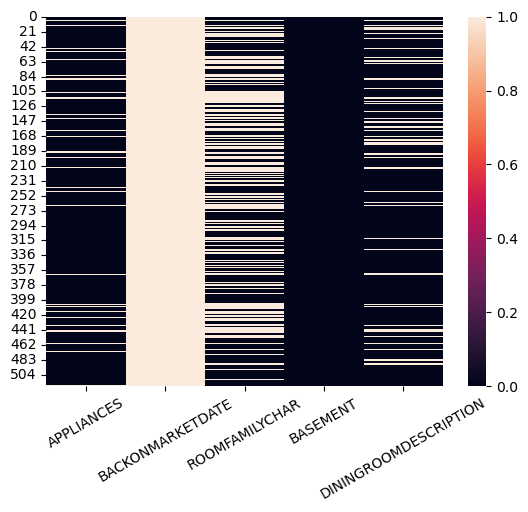

In [39]:
# Sample the dataframe and convert to Pandas
#print(columns)
sample_df = df.select(columns).sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

# Plot it
sns.heatmap(data=tf_df)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Set the answer to the column with the most missing data
answer = 'BACKONMARKETDATE'

### Imputing Missing Data
Missing data happens. If we make the assumption that our data is missing completely at random, we are making the assumption that what data we do have, is a good representation of the population. If we have a few values we could remove them or we could use the mean or median as a replacement. In this exercise, we will look at `'PDOM'`: Days on Market at Current Price.

**Instructions**

- Get a count of the missing values in the column `'PDOM'` using `where()`, `isNull()` and `count()`.
- Calculate the mean value of `'PDOM'` using the aggregate function `mean()`.
- Use `fillna()` with the value set to the `'PDOM'` mean value and only apply it to the column `'PDOM'` using the subset parameter.

In [40]:
# Count missing rows
missing = df.where(df['PDOM'].isNull()).count()

# Calculate the mean value
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
df.fillna(col_mean, subset=['PDOM'])

DataFrame[No.: int, MLSID: string, StreetNumberNumeric: int, streetaddress: string, STREETNAME: string, PostalCode: int, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: int, LISTTYPE: string, OriginalListPrice: int, PricePerTSFT: double, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, LotSizeDimensions: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, Fireplaces: int, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: int, GarageDescription: string, SQFTABOVEGROUND: int, Taxes: int, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: double, TAXYEAR: int, LivingArea: int, UNITNUMBER: string, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, backonmarketdate: int, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: string, R

### Calculate Missing Percents
Automation is the future of data science. Learning to automate some of your data preparation pays dividends. In this exercise, we will automate dropping columns if they are missing data beyond a specific threshold.

**Instructions**

- Define a function `column_dropper()` that takes the parameters df a dataframe and threshold a float between 0 and 1.
- Calculate the percentage of values that are missing using `where()`, `isNull()` and `count()`.
- Check to see if the percentage of missing is higher than the threshold, if so, drop the column using `drop()`.
- Run `column_dropper()` on df with the threshold set to .6

In [41]:
from pyspark.sql.functions import col, isnull
from pyspark.sql import Column, Row

In [42]:
df = df.withColumnRenamed("No.", "No")

In [43]:
len(df.columns)

81

In [44]:
def column_dropper(df, threshold):
    # Takes a dataframe and threshold for missing values. Returns a dataframe.
    total_records = df.count()
    for col in df.columns:
        # Calculate the percentage of missing values
        missing = df.where(isnull(df[col])).count()
        missing_percent = missing / total_records
        # Drop column if percent of missing is more than threshold
        if missing_percent > threshold:
            df = df.drop(col)
    return df

# Drop columns that are more than 60% missing
df = column_dropper(df, 0.6)

In [45]:
len(df.columns)

75

## Getting More Data
1. Getting More Data

The world of Big Data means having access to much more information to include in our analysis. In this video, we will cover how to connect additional data to our dataset.

2. Thoughts on External Data Sets

External data is a wonderful way to boost model performance but there are pros and cons to choosing to include it. Adding external data may add excellent predictors for a model but adding too many features may impact the performance of the model. There is a serious risk of spurious correlations between variables in the world of big data. External data can be a great way to replace missing or aggregated values with a better feature. Adding data comes at the risk of inducing data leakage. If we wish to include local crime information, we will have to ensure that buyers would also have access to that information at the time of purchasing a home. To include data available later is leaking information from the future. Another consideration is how cheap and easy it is to obtain. Today we have many more datasets easily available to us but this may come at the cost of us needing to become the subject matter experts to know the meaning and credibility of our sources.

3. About Joins

To understand the different kinds of joins we'll need to orient ourselves. We will call the original data set we started with the "Left" and the one we wish to incorporate our "Right". There are many ways to join data together most commonly the Inner or Left joins depending on your goals. For us, we want to make sure we ALWAYS keep the full LEFT dataset and add data where available from the RIGHT. This means we will be using a LEFT JOIN.

4. PySpark DataFrame Joins

Joins can be done one of two ways in Pyspark. First is the dataframe join method. The dataframe that calls join is the LEFT dataframe. other is the right dataframe, in this case, the new dataset. on is the pairs of column conditions we will match on. how is the type of join to perform.

5. PySpark Join Example

Suppose we want to see the impact of homes sold on bank holidays. We can join the dataframes together by creating a join condition where df OFFMARKETDATE equals hdf dt We then can put this condition into our join function and use 'left' to make sure we keep all the original records in df. Lastly, count holiday sales by using the tilde to take the NOT of isNull. Not surprising, no houses are sold on a bank holidays, perhaps later we can check if a holiday week impacts sales

6. SparkSQL Join

The second way we can join dataframes together is to use Spark SQL which allows us to apply SQL statments directly to dataframes. This may be your preferred method if you are familiar with SQL or attempting to do complicated joins or filters. To do this we need to register the dataframe as temp table and give it a name. Once that's done we can then use spark sql to execute a query and return it back in the form of a dataframe. In this one, we are using SELECT star to get all of the columns available, using FROM df to create our starting table, LEFT JOIN hdf as the table we'd like to join with and using ON df OFFMARKETDATE equals hdf dt to create the join condition.

7. Let's Join Some Data!

In this video, we learned combining datasets can be powerful but requires some caution. We also learned how to join data in two different ways. In the exercises, we will build on these and learn some things to watch out for!

### A Dangerous Join
In this exercise, we will be joining on Latitude and Longitude to bring in another dataset that measures how walk-friendly a neighborhood is. We'll need to be careful to make sure our joining columns are the same data type and ensure we are joining on the same precision (number of digits after the decimal) or our join won't work!

Below you will find that `df['latitude']` and `df['longitude']` are at a higher precision than `walk_df['longitude']` and `walk_df['latitude']` we'll need to round them to the same precision so the join will work correctly.

**Instructions**

- Convert `walk_df['latitude']` and `walk_df['longitude']` to type double by using `cast('double')` on the column and replacing the column in place `withColumn()`.
- Round the columns in place with `withColumn()` and `round('latitude', 5)` and `round('longitude', 5)`.
- Create the join condition of `walk_df['latitude']` matching `df['latitude']` and `walk_df['longitude']` matching `df['longitude']`.
- Join `df` and `walk_df` together with `join()`, using the condition above and the left join type. Save the joined dataframe as `join_df`.

In [46]:
# This cell should be used to import the walk_df dataset once they send it


In [47]:
'''
# Cast data types
walk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))
walk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))

# Round precision
df = df.withColumn('longitude', round('longitude', 5))
df = df.withColumn('latitude', round('latitude', 5))

# Create join condition
condition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]

# Join the dataframes together
join_df = df.join(walk_df, on=condition, how='left')
# Count non-null records from new field
print(join_df.where(~join_df['walkscore'].isNull()).count())
'''

"\n# Cast data types\nwalk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))\nwalk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))\n\n# Round precision\ndf = df.withColumn('longitude', round('longitude', 5))\ndf = df.withColumn('latitude', round('latitude', 5))\n\n# Create join condition\ncondition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]\n\n# Join the dataframes together\njoin_df = df.join(walk_df, on=condition, how='left')\n# Count non-null records from new field\nprint(join_df.where(~join_df['walkscore'].isNull()).count())\n"

### Spark SQL Join
Sometimes it is much easier to write complex joins in SQL. In this exercise, we will start with the join keys already in the same format and precision but will use SparkSQL to do the joining.

**Instructions**

- Register the Dataframes as SparkSQL tables with `createOrReplaceTempView`, name them the `df` and `walk_df` respectively.
- In the `join_sql` string, set the left table to `df` and the right table to `walk_df`
- Call `spark.sql()` on the `join_sql` string to perform the join.

In [48]:
'''
# Register dataframes as tables
df.createOrReplaceTempView("df")
walk_df.createOrReplaceTempView("walk_df")

# SQL to join dataframes
join_sql = 	"""
            SELECT 
                *
            FROM df
            LEFT JOIN walk_df
            ON df.longitude = walk_df.longitude
            AND df.latitude = walk_df.latitude
            """
# Perform sql join
joined_df = spark.sql(join_sql)
'''

'\n# Register dataframes as tables\ndf.createOrReplaceTempView("df")\nwalk_df.createOrReplaceTempView("walk_df")\n\n# SQL to join dataframes\njoin_sql = \t"""\n            SELECT \n                *\n            FROM df\n            LEFT JOIN walk_df\n            ON df.longitude = walk_df.longitude\n            AND df.latitude = walk_df.latitude\n            """\n# Perform sql join\njoined_df = spark.sql(join_sql)\n'

### Checking for Bad Joins
Joins can go bad silently if we are not careful, meaning they will not error out but instead return mangled data with more or less data than you'd intended. Let's take a look at a couple ways that joining incorrectly can change your data set for the worse.

In this example we will look at what happens if you join two dataframes together when the join keys are not the same precision and compare the record counts between the correct join and the incorrect one.

**Instructions**

- Create a join between `df_orig`, the dataframe before its precision was corrected, and `walk_df` that matches on longitude and latitude in the respective dataframes.
- Count the number of missing values with `where()` `isNull()` on `df['walkscore']` and `correct_join['walkscore']`. You should notice that there are many missing values because our datatypes and precision do not match.
- Create a join between `df` and `walk_df` that only matches on longitude
- Count the number of records with `count()`: few_keys_df and `correct_join_df`. You should notice that there are many more values as we have not constrained our matching correctly.

In [49]:
#This cell should be used to create the right condition df and the origial df

In [52]:
'''
# Join on mismatched keys precision 
wrong_prec_cond = [df_orig['longitude'] == walk_df['longitude'], df_orig['latitude'] == walk_df['latitude']]
wrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how='left')

# Compare bad join to the correct one
print(wrong_prec_df.where(wrong_prec_df['walkscore'].isNull()).count())
print(correct_join_df.where(correct_join_df['walkscore'].isNull()).count())

# Create a join on too few keys
few_keys_cond = [df['longitude'] == walk_df['longitude']]
few_keys_df = df.join(walk_df, on=few_keys_cond, how='left')

# Compare bad join to the correct one
print("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))
print("Record Count of the Correct Join Example: " + str(correct_join_df.count()))
'''

'\n# Join on mismatched keys precision \nwrong_prec_cond = [df_orig[\'longitude\'] == walk_df[\'longitude\'], df_orig[\'latitude\'] == walk_df[\'latitude\']]\nwrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how=\'left\')\n\n# Compare bad join to the correct one\nprint(wrong_prec_df.where(wrong_prec_df[\'walkscore\'].isNull()).count())\nprint(correct_join_df.where(correct_join_df[\'walkscore\'].isNull()).count())\n\n# Create a join on too few keys\nfew_keys_cond = [df[\'longitude\'] == walk_df[\'longitude\']]\nfew_keys_df = df.join(walk_df, on=few_keys_cond, how=\'left\')\n\n# Compare bad join to the correct one\nprint("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))\nprint("Record Count of the Correct Join Example: " + str(correct_join_df.count()))\n'